# Fitting Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.table import QTable
from astropy import units as u

In [2]:
plt.style.use('bmh')

# Fitting data with a ploynomial - `np.polyfit()`

## `np.ployfit(x-data array, y-data array, order-of-fit)`

---

## First-order fitting:  $f(x) = ax + b$

In [3]:
my_data1 = QTable.read('https://uwashington-astro300.github.io/A300_Data/fit_data1.csv', 
                       format='ascii.csv')

my_data1['x'].unit = u.s
my_data1['y'].unit = u.m

my_x = my_data1['x']
my_y = my_data1['y']

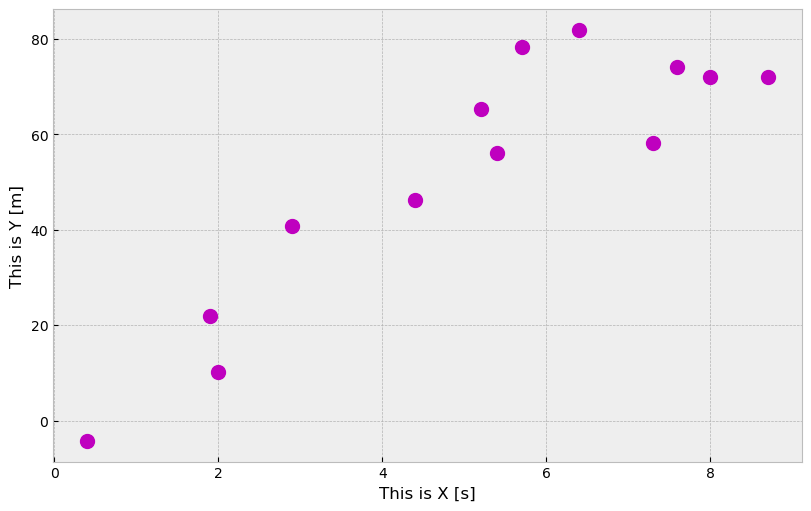

In [4]:
fig, ax = plt.subplots(
    figsize = (8, 5), 
    constrained_layout = True
)

ax.set_xlabel(f"This is X [{my_x.unit}]")
ax.set_ylabel(f"This is Y [{my_y.unit}]")

ax.plot(my_x, my_y,
        color = "m",
        marker = "o",
        linestyle = "None",
        markersize = 10);

### Use `.value` to just send the values (not units) to the fitting function

In [5]:
my_fit1 = np.polyfit(my_x.value, my_y.value, 1)

my_fit1       # The coefficients of the fit (a,b)

array([9.4650469, 3.8158527])

### You can use `np.poly1d(fit-parameters)` to plot and explore the fitted polynomial

In [60]:
fitted_polynomial = np.poly1d(my_fit1)
fitted_polynomial, fitted_polynomial[0], fitted_polynomial[1]

(poly1d([9.4650469, 3.8158527]), 3.8158526963094395, 9.465046900898294)

### Now send the fitted polynomial the x-data to make a fit

* It will have the same units as the y-data

In [7]:
my_data1['Fit'] = fitted_polynomial(my_x.value) * my_y.unit

In [8]:
my_data1[0:2]

x,y,Fit
s,m,m
float64,float64,float64
0.4,-4.28874144048,7.601871456668757
1.9,22.0030414699,21.799441808016194


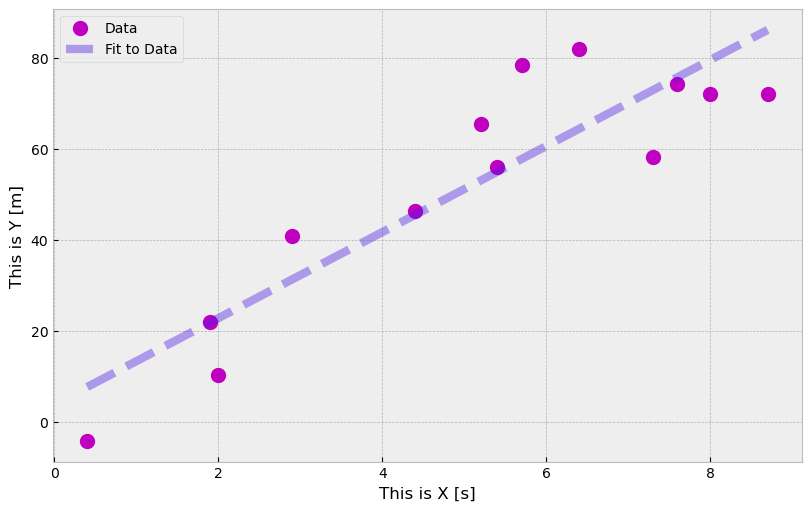

In [9]:
fig, ax = plt.subplots(
    figsize = (8, 5), 
    constrained_layout = True
)

ax.set_xlabel(f"This is X [{my_x.unit}]")
ax.set_ylabel(f"This is Y [{my_y.unit}]")

ax.plot(my_x, my_y,
        color = "m",
        marker = "o",
        linestyle = "None",
        markersize = 10,
        label = "Data")

ax.plot(my_x, my_data1['Fit'],
        marker = "None",
        linewidth = 6,
        color = (0.3, 0.1, 0.9, 0.4),
        linestyle = '--',
        label = "Fit to Data")

ax.legend(loc=0);

In [10]:
fitted_polynomial(5)                 # value of f(x) at x = 5

51.14108720080091

In [11]:
f"When X is 5 {my_x.unit} then Y will be {fitted_polynomial(5):.1f} {my_y.unit}" 

'When X is 5 s then Y will be 51.1 m'

In [12]:
fitted_polynomial.roots              # value of x at f(x) = 0

array([-0.40315201])

In [13]:
f"When Y is 0 {my_y.unit} then X will be {fitted_polynomial.roots[0]:.1f} {my_x.unit}" 

'When Y is 0 m then X will be -0.4 s'

In [14]:
(fitted_polynomial - 40).roots       # value of x at f(x) = 40

array([3.82292319])

In [15]:
f"When Y is 40 {my_y.unit} then X will be {(fitted_polynomial - 40).roots[0]:.1f} {my_x.unit}" 

'When Y is 40 m then X will be 3.8 s'

---
## Second-order fitting:  $f(x) = ax^2 + bx + c$

In [16]:
my_data2 = QTable.read('https://uwashington-astro300.github.io/A300_Data/fit_data2.csv', 
                       format='ascii.csv')

my_data2['x'].unit = u.s
my_data2['y'].unit = u.m

my_x = my_data2['x']
my_y = my_data2['y']

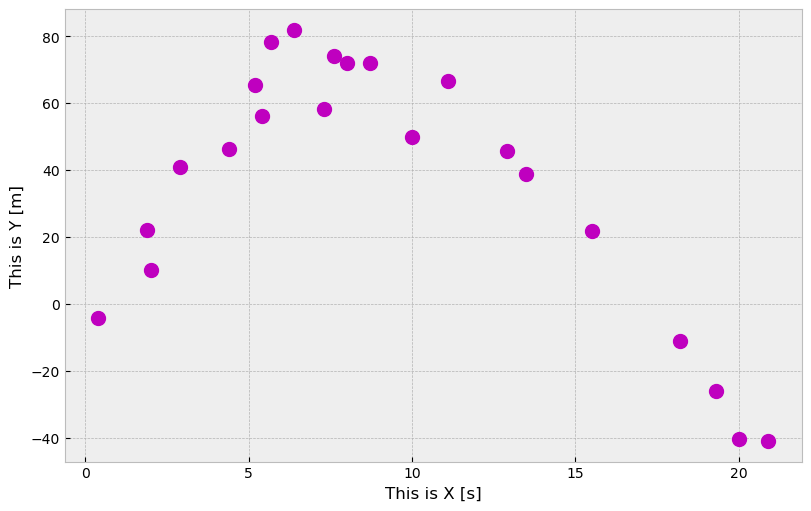

In [17]:
fig, ax = plt.subplots(
    figsize = (8, 5), 
    constrained_layout = True
)

ax.set_xlabel(f"This is X [{my_x.unit}]")
ax.set_ylabel(f"This is Y [{my_y.unit}]")

ax.plot(my_x, my_y,
        color = "m",
        marker = "o",
        linestyle = "None",
        markersize = 10);

In [18]:
my_fit2 = np.polyfit(my_x.value, my_y.value, 2)

my_fit2

array([-0.87495323, 15.67578454, -2.22790887])

In [19]:
fitted_polynomial = np.poly1d(my_fit2)

In [20]:
my_data2['Fit'] = fitted_polynomial(my_x.value) * my_y.unit

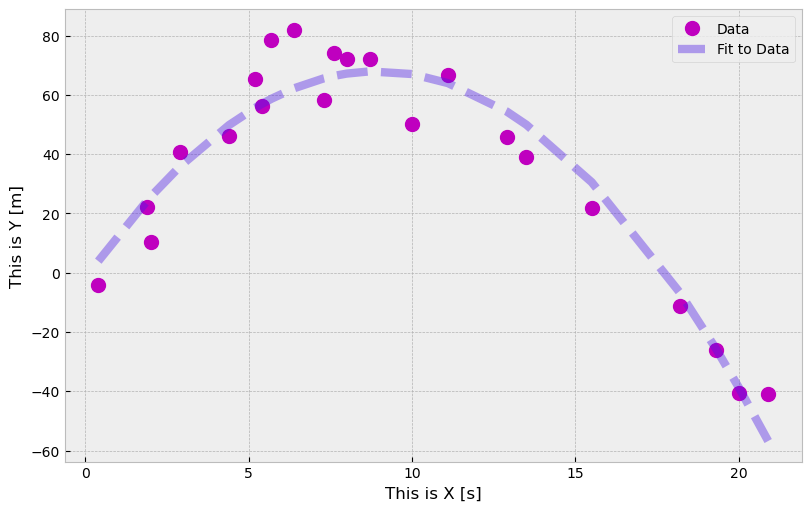

In [21]:
fig, ax = plt.subplots(
    figsize = (8, 5), 
    constrained_layout = True
)

ax.set_xlabel(f"This is X [{my_x.unit}]")
ax.set_ylabel(f"This is Y [{my_y.unit}]")

ax.plot(my_x, my_y,
        color = "m",
        marker = "o",
        linestyle = "None",
        markersize = 10,
        label = "Data")

ax.plot(my_x, my_data2['Fit'],
        marker = "None",
        linewidth = 6,
        color = (0.3, 0.1, 0.9, 0.4),
        linestyle = '--',
        label = "Fit to Data")

ax.legend(loc=0);

In [22]:
fitted_polynomial(5)                 # value of f(x) at x = 5

54.27718300980439

In [23]:
f"When X is 5 {my_x.unit} then Y will be {fitted_polynomial(5):.1f} {my_y.unit}" 

'When X is 5 s then Y will be 54.3 m'

In [24]:
fitted_polynomial.roots              # value of x at f(x) = 0

array([17.77286999,  0.14326992])

In [25]:
f"When Y is 0 {my_y.unit} then X will be {fitted_polynomial.roots[0]:.1f} or {fitted_polynomial.roots[1]:.1f} {my_x.unit}"

'When Y is 0 m then X will be 17.8 or 0.1 s'

In [26]:
(fitted_polynomial - 40).roots       # value of x at f(x) = 40

array([14.6135072,  3.3026327])

In [27]:
f"When Y is 40 {my_y.unit} then X will be {(fitted_polynomial - 40).roots[0]:.1f} or {(fitted_polynomial - 40).roots[1]:.1f} {my_x.unit}"

'When Y is 40 m then X will be 14.6 or 3.3 s'

In [28]:
(fitted_polynomial - 80).roots       # value of x at f(x) = 80, no real root

array([8.95806995+3.7057737j, 8.95806995-3.7057737j])

---

## Side Topic - Complex Numbers

* Python uses `j` for the imaginary  part of a complex number
* `numpy` has *some* support for complex numbers

In [29]:
my_solutions = np.array([3.2 + 2.7j, 3.3j, 2.6 + 0j, 6.9])

In [30]:
my_solutions

array([3.2+2.7j, 0. +3.3j, 2.6+0.j , 6.9+0.j ])

In [31]:
np.isreal(my_solutions)

array([False, False,  True,  True])

In [32]:
np.iscomplex(my_solutions)

array([ True,  True, False, False])

## Just the Real Solutions

In [33]:
my_solutions[np.isreal(my_solutions)]

array([2.6+0.j, 6.9+0.j])

### A little neater

In [34]:
my_solutions[np.isreal(my_solutions)].real

array([2.6, 6.9])

In [35]:
my_solutions[np.isreal(my_solutions)][0].real

2.6

### Just the Complex Solutions

In [36]:
my_solutions[np.iscomplex(my_solutions)]

array([3.2+2.7j, 0. +3.3j])

### Remember: A complex root cannot be the solution to a **real world** problem.

* Except for the infinite number of exceptions
* You know what I mean ....

### Also: The real part of a complex number is NOT a real number solution

* This is NOT a real solution:

In [37]:
my_solutions[np.iscomplex(my_solutions)][0].real

3.2

---

## Be careful! Very high-order fits (are almost always) garbage

In [38]:
my_data1 = QTable.read('https://uwashington-astro300.github.io/A300_Data/fit_data1.csv',
                       format='ascii.csv')

my_data1['x'].unit = u.s
my_data1['y'].unit = u.m

my_x = my_data1['x']
my_y = my_data1['y']

In [39]:
my_fit3 = np.polyfit(my_x.value, my_y.value, 20)

fitted_polynomial = np.poly1d(my_fit3)

/tmp/ipykernel_369/4270111381.py:1: RankWarning: Polyfit may be poorly conditioned
  my_fit3 = np.polyfit(my_x.value, my_y.value, 20)


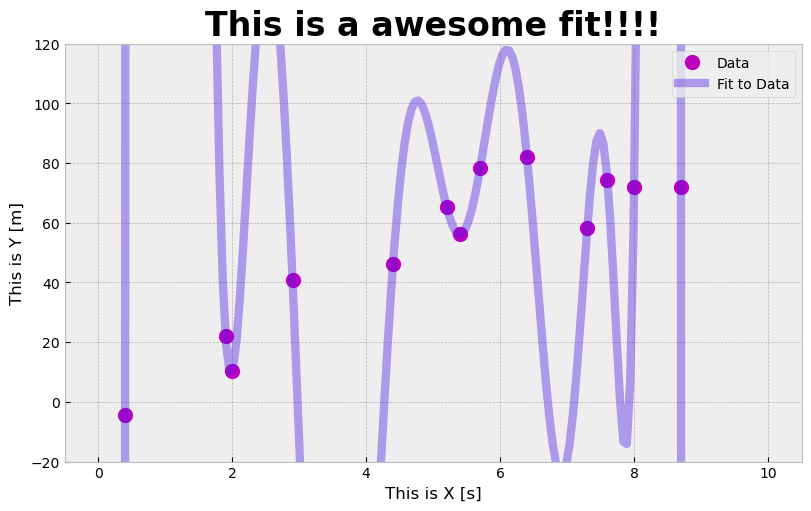

In [40]:
fig, ax = plt.subplots(
    figsize = (8, 5), 
    constrained_layout = True
)

ax.set_xlabel(f"This is X [{my_x.unit}]")
ax.set_ylabel(f"This is Y [{my_y.unit}]")
ax.set_title('This is a awesome fit!!!!', 
             fontsize = 24, 
             fontweight = 'bold')


ax.set_ylim(-20,120)

xx = np.linspace(0,10,200)

ax.plot(my_x, my_y,
        color = "m",
        marker = "o",
        linestyle = "None",
        markersize = 10,
        label = "Data")

ax.plot(xx, fitted_polynomial(xx),
        linewidth = 6,
        color = (0.3, 0.1, 0.9, 0.4),
        linestyle = '-',
        label = "Fit to Data")

ax.legend(loc=0);

---

## Side Topic - The unpack operator (**\***)

 * The unpacking operator takes a list and unpacks each value and sends each, in order.
 * It makes a list **iterable**

In [41]:
my_list = np.array([3.1, 5.6, 11.5, 19.6])

my_list

array([ 3.1,  5.6, 11.5, 19.6])

In [42]:
def some_numbers(a, b, c, d):
    my_string = f"I have four numbers: {a}, {b}, {c}, and {d}"
    print(my_string)

### This will **not** work as the list (`my_list`) is sent as one blob:

In [43]:
#some_numbers(my_list)

### This **will** work as the list (`*my_list`) is unpacked and sent as 4 pieces:

In [44]:
some_numbers(*my_list)

I have four numbers: 3.1, 5.6, 11.5, and 19.6


---

# Fitting a specific function - `curve_fit`

In [45]:
from scipy.optimize import curve_fit

In [46]:
my_data3 = QTable.read('https://uwashington-astro300.github.io/A300_Data/fit_data3.csv',
                       format='ascii.csv')

my_data3['x'].unit = u.s
my_data3['y'].unit = u.m

my_x = my_data3['x']
my_y = my_data3['y']

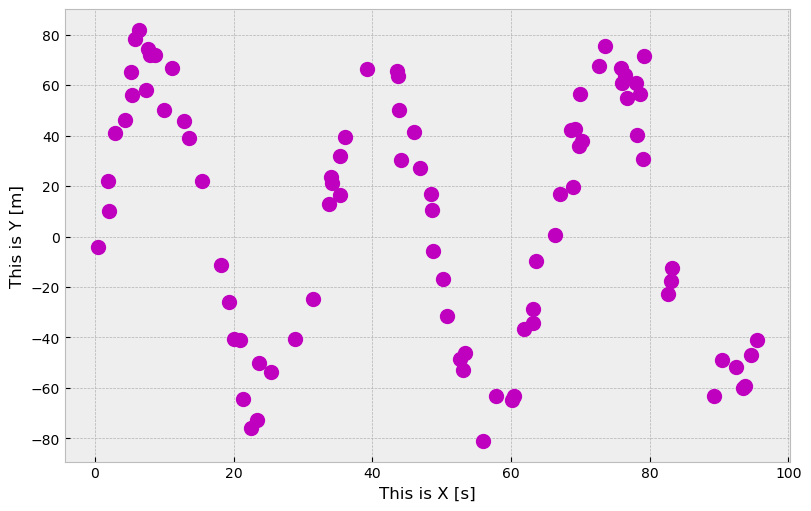

In [47]:
fig, ax = plt.subplots(
    figsize = (8, 5), 
    constrained_layout = True
)

ax.set_xlabel(f"This is X [{my_x.unit}]")
ax.set_ylabel(f"This is Y [{my_y.unit}]")

ax.plot(my_x, my_y,
        color = "m",
        marker = "o",
        linestyle = "None",
        markersize = 10);



$$ \huge
f(x) = a \sin(bx) 
$$

### You need to provide f(x)

* The first argument needs to be the points to fit (`my_x`)
* The other arguments are the parameters to be fit (`my_a, my_b`)
* The function just returns: `f(x)`

In [48]:
def ringo(my_x, my_a, my_b):
    return my_a * np.sin(my_b * my_x)

#### You need to provide an initial guess to the parameters `a` and `b`

* `a` is the amplitude. Look at the graph and the maximum amplitude is about 80
* `b` is related to the period
   * We know $\sin(\pi)$ = 0
   * So `Y` = 0 when bx = $\pi$
   * Look at graph - `Y` = 0 is when `X` = 18 so b = $\pi$/18 which is ~3/18 (0.17)

In [49]:
my_guess_a = 80.0
my_guess_b = 3/18

init_guesses = [my_guess_a, my_guess_b]

#### My Parameters:

* `Function to fit = ringo`
* `X points to fit = my_data3['x']`
* `Y points to fit = my_data3['y']`
* `Initial guess (`p0`) at values for a,b = init_guesses`

In [50]:
fitpars, error = curve_fit(ringo,
                           my_x.value, my_y.value,
                           p0 = init_guesses)

print(fitpars)

[68.14778865  0.1911845 ]


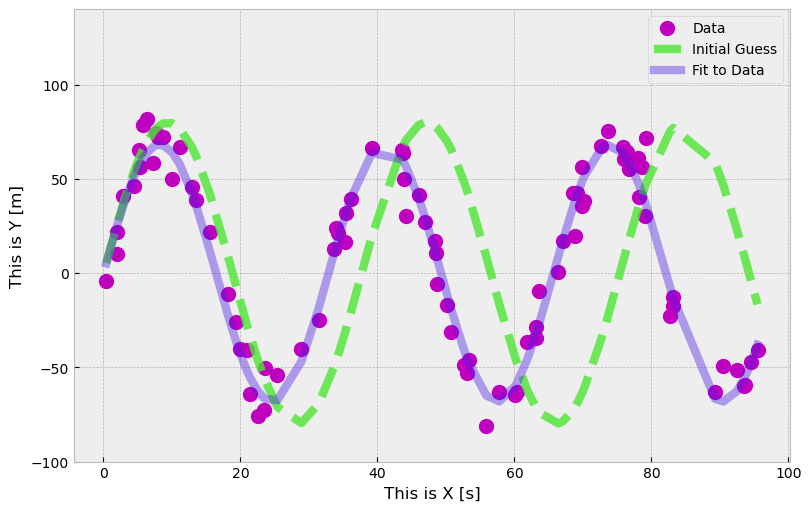

In [51]:
fig, ax = plt.subplots(
    figsize = (8, 5), 
    constrained_layout = True
)

ax.set_ylim(-100,140)

ax.set_xlabel(f"This is X [{my_x.unit}]")
ax.set_ylabel(f"This is Y [{my_y.unit}]")

ax.plot(my_x, my_y,
        color = "m",
        marker = "o",
        linestyle = "None",
        markersize = 10,
        label = "Data")

# Need to send .value to function (ringo)

ax.plot(my_x, ringo(my_x.value, *init_guesses),
        color = (0.3, 0.9, 0.2, 0.8),
        marker = "None",
        linestyle = "--",
        linewidth = 6,
        label = "Initial Guess")

ax.plot(my_x, ringo(my_x.value, *fitpars),
        color = (0.3, 0.1, 0.9, 0.4),
        marker = "None",
        linestyle = "-",
        linewidth = 6,
        label = "Fit to Data")

ax.legend(loc=0);

### Bad initial guesses can lead to very bad fits

In [52]:
my_guess_a = 68.0
my_guess_b = 1.0/4

init_guesses = [my_guess_a, my_guess_b]

In [53]:
fitpars, error = curve_fit(ringo,
                           my_x.value, my_y.value,
                           p0 = init_guesses)

print(fitpars)

[23.2708979   0.26836528]


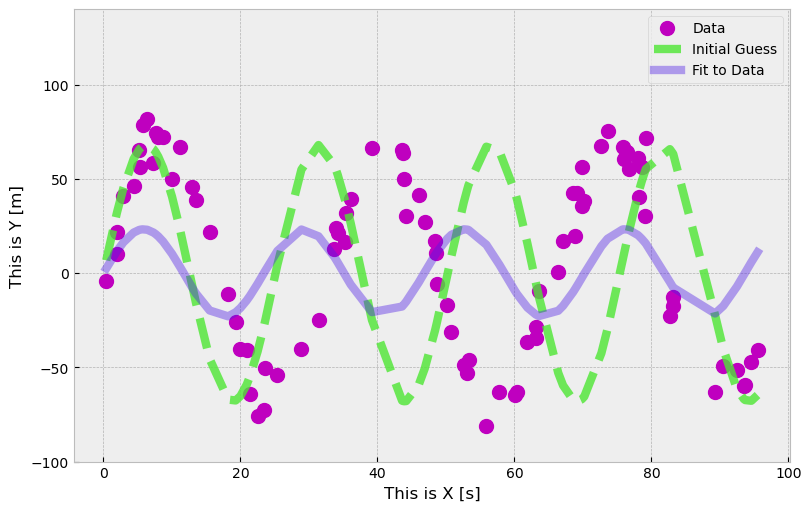

In [54]:
fig, ax = plt.subplots(
    figsize = (8, 5), 
    constrained_layout = True
)

ax.set_ylim(-100,140)

ax.set_xlabel(f"This is X [{my_x.unit}]")
ax.set_ylabel(f"This is Y [{my_y.unit}]")

ax.plot(my_x, my_y,
        color = "m",
        marker = "o",
        linestyle = "None",
        markersize = 10,
        label = "Data")

ax.plot(my_x.value, ringo(my_x.value, *init_guesses),
        color = (0.3, 0.9, 0.2, 0.8),
        marker = "None",
        linestyle = "--",
        linewidth = 6,
        label = "Initial Guess")

ax.plot(my_x.value, ringo(my_x.value, *fitpars),
        color = (0.3, 0.1, 0.9, 0.4),
        marker = "None",
        linestyle = "-",
        linewidth = 6,
        label = "Fit to Data")

ax.legend(loc=0);

---

### Side Topic - Scaling data: Normalization

* It is often useful to rescale your data.
* One of the most common types of rescaling is called: `min-max normalization`.
* This method rescales that data so the range of the `y-data` is `[0->1]`

$$ \Large
\text{Normalized}(y)={\frac  {y-{\text{min}}(y)}{{\text{max}}(y)-{\text{min}}(y)}}
$$

In [55]:
def normalize_data(data_array):
    result = (data_array - data_array.min()) / (data_array.max() - data_array.min())
    return result

In [56]:
my_y.min(), my_y.max()

(<Quantity -81.03709873 m>, <Quantity 81.93068219 m>)

In [57]:
y_normal = normalize_data(my_y)

In [58]:
y_normal.min(), y_normal.max()

(<Quantity 0.>, <Quantity 1.>)

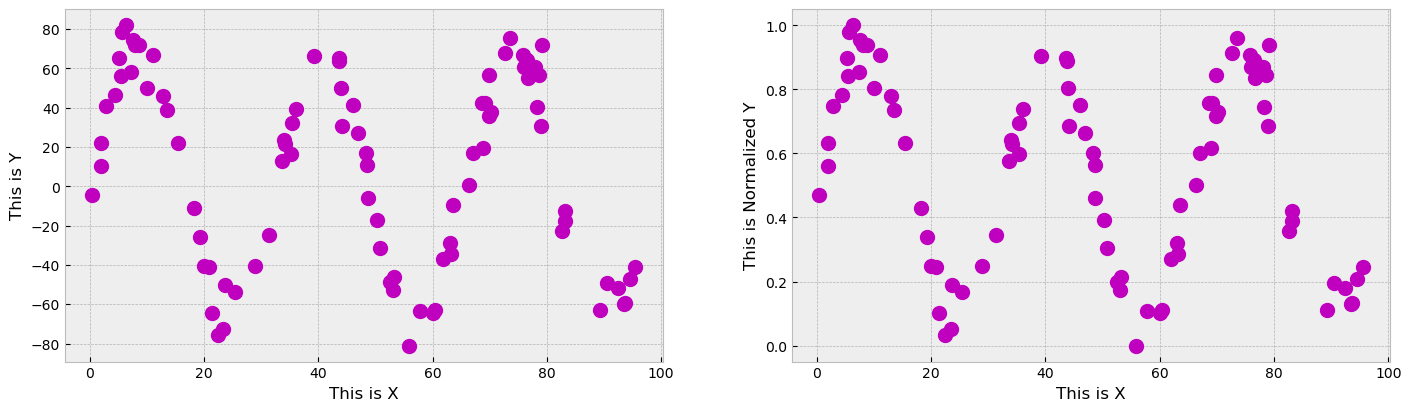

In [59]:
fig, ax = plt.subplot_mosaic(
    '''
    AB
    ''',
    figsize = (14, 4), 
    constrained_layout = True
)

fig.set_constrained_layout_pads(wspace = .10)


ax['A'].set_xlabel("This is X")
ax['A'].set_ylabel("This is Y")

ax['A'].plot(my_x.value, my_y.value,
           color = "m",
           marker = "o",
           linestyle = "None",
           markersize = 10)

ax['B'].set_xlabel("This is X")
ax['B'].set_ylabel("This is Normalized Y")

ax['B'].plot(my_x.value, y_normal.value,
           color = "m",
           marker = "o",
           linestyle = "None",
           markersize = 10);